# Install ORTEGA

In [16]:
!pip install ortega

  Using cached ortega-0.0.31-py3-none-any.whl (16 kB)


In [1]:
import pandas as pd
import ortega

# Read movement data of two moving entities
The input data must contain following fields: unique id for the two moving entities, and longitude, latitude, and local time for each tracking point.

The time field must be converted to datetime type and the value must contains year, month, day, hour, minute, and second. 

In [2]:
bigdata = pd.read_csv('/path/Mother_Cub1.csv', sep=',',header=0)
bigdata['Time_LMT'] = pd.to_datetime(bigdata.Time_LMT)
print('total number of gps points:', bigdata.shape[0])

total number of gps points: 10414


# Initializing ORTEGA object
Parameters of ORTEGA class:
1. start_time, end_time: They can be used to select the portion of movement data that falls in this time interval.
2. minute_delay: The allowable time lag parameter in minutes. Usually, this number should be greater than the temporal resolution of movement data.
3. max_el_time_min: If the time interval between two consecutive points is larger than this parameter, ORTEGA will not create PPA and treat this time interval as a stationary activity when individuals are not moving.
4. latitude_field, longitude_field, id_field, time_field: users need to specify the field names based on the data they used.

In [4]:
interaction1 = ortega.ORTEGA(data=bigdata,
                             start_time='2020-01-01 00:00:00',  ##set a time window to subset data
                             end_time='2020-01-10 00:00:00',
                             minute_delay=60,
                             time_field='Time_LMT',
                             id_field='idcollar',
                             )

2023-02-15 09:48:48.805094 Initializing ORTEGA object...
2023-02-15 09:48:48.810346 Generate PPA list for the two moving entities...
2023-02-15 09:48:48.892884 Generating PPA list completed!
2023-02-15 09:48:48.969024 Initialization success!


# implement interaction analysis

The below cell runs interaction_analysis() and it returns three values. 
- The first value is a list of intersecting PPA pairs as paired built-in Ellipse objects.
- The second return value is a dataframe containing all intersecting PPA pairs. 
- The third return value is a dataframe that includes all identified continuous interaction segments (interaction events).

In [5]:
intersecting_ellipse_list, df_intersecting_PPAs, df_duration = interaction1.interaction_analysis()

2023-02-15 09:48:50.347424 Implement interaction analysis...
2023-02-15 09:48:50.347501 Getting spatial and temporal intersection pairs...
2023-02-15 09:48:50.649905 Getting spatial and temporal intersection pairs completed!
2023-02-15 09:48:50.650053 Complete! 244 pairs of intersecting PPAs found!
2023-02-15 09:48:50.653122 Compute duration of interaction...
2023-02-15 09:48:50.670359 Complete! 10 interaction events identified!


The beblow results indicate 10 interaction events between these two moving entities.
The dataframe df_duration includes six columns: 
- No: event no. sorted by start time
- P1: unique id for individual 1
- P2: unique id for individual 2
- Start: start time of the interaction
- End: end time of the interaction
- Duration: duration of the interaction event (in minutes)

In [6]:
df_duration

,No,P1,P2,Start,End,Duration
0,1,131343,229012,2020-01-01 13:00:00,2020-01-02 09:00:00,1200.0
1,2,131343,229012,2020-01-02 14:00:00,2020-01-03 09:00:00,1140.0
2,3,131343,229012,2020-01-03 12:00:00,2020-01-03 16:00:00,240.0
3,4,131343,229012,2020-01-03 18:00:00,2020-01-04 04:00:00,600.0
4,5,131343,229012,2020-01-04 05:00:00,2020-01-04 09:00:00,240.0
5,6,131343,229012,2020-01-04 10:00:00,2020-01-04 22:00:00,720.0
6,7,131343,229012,2020-01-06 04:00:00,2020-01-06 21:00:00,1020.0
7,8,131343,229012,2020-01-07 18:00:00,2020-01-08 12:00:00,1080.0
8,9,131343,229012,2020-01-08 13:00:00,2020-01-08 22:00:00,540.0
9,10,131343,229012,2020-01-09 01:00:00,2020-01-09 10:00:00,540.0


# Compute PPA size and use violin plots to show the distribution

In [7]:
ppasize_list = ortega.ppastatistics.compute_ppa_size(interaction1)

Descriptive statistics of PPA ellipses length for id 131343:
count    211.000000
mean       0.011611
std        0.015372
min        0.000224
25%        0.001126
50%        0.004579
75%        0.016276
max        0.092675
dtype: float64
Descriptive statistics of PPA ellipses length for id 229012:
count    208.000000
mean       0.004641
std        0.007525
min        0.000226
25%        0.000767
50%        0.001739
75%        0.005046
max        0.072471
dtype: float64


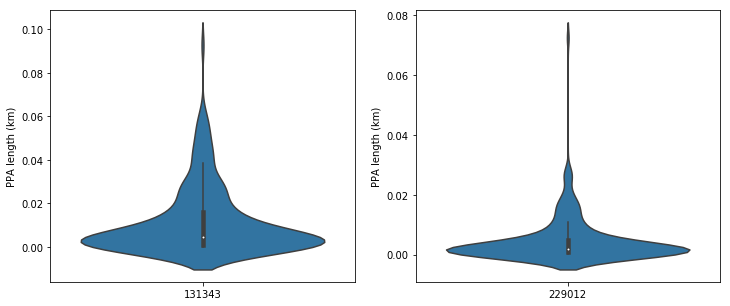

In [11]:
import seaborn
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
seaborn.violinplot(data=ppasize_list[0], ax=ax1)
seaborn.violinplot(data=ppasize_list[1], ax=ax2)
ax1.set_xticklabels([str(interaction1.id1)])
ax2.set_xticklabels([str(interaction1.id2)])
ax1.set_ylabel('PPA length (km)')
ax2.set_ylabel('PPA length (km)')
plt.show()

# Compute PPA interval and use violin plot to show the distribution

In [12]:
interval_list = ortega.ppastatistics.compute_ppa_interval(interaction1)

Descriptive statistics of PPA ellipses time interval (minutes) for id 131343:
count    211.000000
mean      61.421801
std        9.237981
min       57.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      122.000000
Name: Time_LMT, dtype: float64
Descriptive statistics of PPA ellipses time interval (minutes) for id 229012:
count    208.000000
mean      62.307692
std       18.547538
min       57.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      300.000000
Name: Time_LMT, dtype: float64


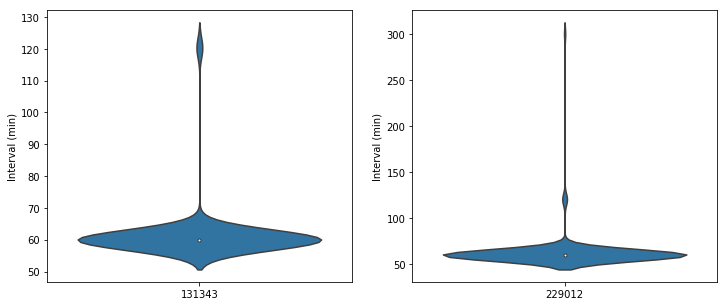

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
seaborn.violinplot(data=interval_list[0].tolist(), ax=ax1)
seaborn.violinplot(data=interval_list[1].tolist(), ax=ax2)
ax1.set_xticklabels([interaction1.id1])
ax2.set_xticklabels([interaction1.id2])
ax1.set_ylabel('Interval (min)')
ax2.set_ylabel('Interval (min)')
plt.show()

# Map the results of interaction analysis
two tracks are shown in blue and red ellipses respectively, intersecting PPAs are highlighted in yellow

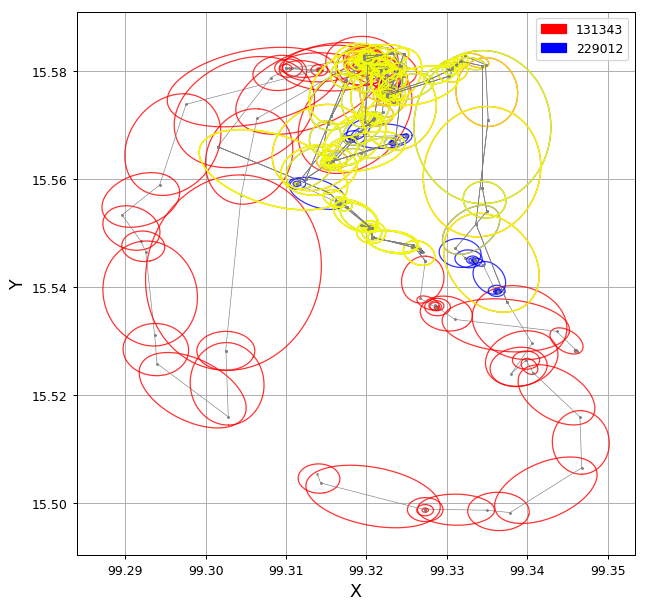

In [14]:
ortega.visualization.plot_interaction(interaction1, intersecting_ellipse_list)

map the original tracks without annotating intersecting portion

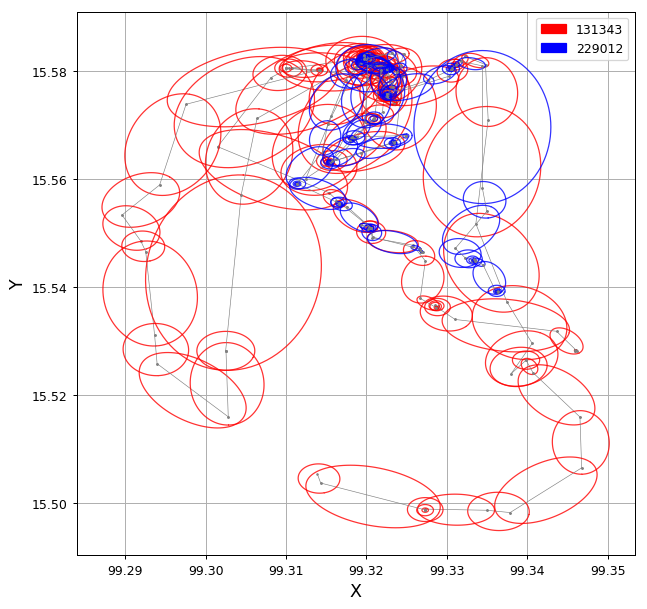

In [15]:
ortega.visualization.plot_original_tracks(interaction1) 

# Explore the difference in speed and movement  direction when individuals interact

Descriptive statistics of percentage difference in movement speed between intersecting PPAs:
count    244.000000
mean       1.025721
std        0.595763
min        0.009883
25%        0.510760
50%        1.027165
75%        1.512950
max        1.993491
Name: diff_speed, dtype: float64


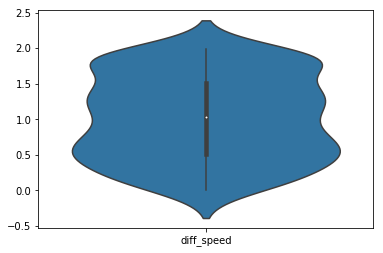

In [16]:
df_pair_speed = ortega.ppastatistics.compute_ppa_speed(df_intersecting_PPAs)
ax = seaborn.violinplot(data=df_pair_speed['diff_speed'])
ax.set_xticklabels(['diff_speed'])
plt.show()

Descriptive statistics of difference in movement direction between intersecting PPAs:
count    244.000000
mean      80.059066
std       55.541540
min        0.265990
25%       30.013080
50%       77.128385
75%      127.124269
max      178.922327
Name: diff_direction, dtype: float64


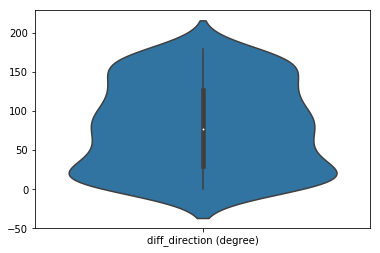

In [17]:
df_pair_angle = ortega.ppastatistics.compute_ppa_direction(df_intersecting_PPAs)
ax = seaborn.violinplot(data=df_pair_angle['diff_direction'])
ax.set_xticklabels(['diff_direction (degree)'])
plt.show()